# Aug 24th, 2022 (LFR reboot 2)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [178]:
fig_dir = pjoin(fig_base_dir, 'paper2.0', 'LFR_lastbin')
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/LFR_lastbin

## Prep

In [2]:
nn = 512
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, 3)
bt = BootStrap(**props_ca)
pal = prepare_palette()

# Degree fix
for mode, o in bt_dict.items():
    o.run_deg = np.array(o.run_deg)
    o.run_deg[o.run_deg == 0] = np.nan

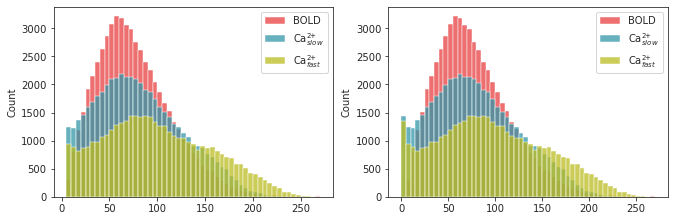

In [3]:
fig, axes = create_figure(1, 2, (11, 3.5))

for mode, o in bt_dict.items():
    sns.histplot(
        data=o.run_deg[o.run_deg.nonzero()],
        bins=np.linspace(5, 270, 54),
        color=pal[mode],
        label=mode,
        ax=axes[0],
    )
    sns.histplot(
        data=o.run_deg[o.run_deg.nonzero()],
        bins=np.linspace(0, 270, 55),
        color=pal[mode],
        label=mode,
        ax=axes[1],
    )
for ax in axes.flat:
    ax.legend()
plt.show()

## Mk LFR

In [4]:
from analysis.lfr import mk_lfr, load_lfr, extract_true_k, compile_lfr_results

lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')
mode2lbl = {BOLD: 'BO', CAS: 'CAS', CAF: 'CAF'}

In [5]:
mu = 0.1
ofs = np.linspace(0.10, 0.90, 9)
oms = [2, 3]
looper = [(0, 0)] + list(zip(
    np.repeat(ofs, len(oms)),
    np.tile(oms, len(ofs)),
))

### 1) save lfr flags

In [5]:
for mode, o in bt_dict.items():
    degs = {}
    for key, (i, j, k) in o.address.items():
        degs[f"{mode2lbl[mode]}_{key}"] = o.run_deg[i, j, k]

    for of, om in looper:
        name = [
            f"of{of}",
            f"om{om}",
            f"mu{mu}",
        ]
        name = '-'.join(name)
        mk_lfr(
            name=name,
            lfr_dir=lfr_dir,
            degs=degs,
            of=of,
            om=om,
        )

### 2) ./run_lfr.sh
Run this in terminal

### 3) extract_true_k

In [6]:
%%time

extract_true_k(lfr_dir)

Warning, not found:  of0-om0-mu0.1_BO_sub-SLC08_ses-2_run-1

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC02_ses-3_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-1_run-2

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-1_run-4

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-1_run-6

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-2_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-2_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-2_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-3_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-3_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC03_ses-3_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-1_run-1

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-1_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-1_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-1_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-2_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-2_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-2_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC04_ses-3_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-1_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-1_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-1_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-2_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-2_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-3_run-3

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC05_ses-3_run-7

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC09_ses-1_run-1

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC09_ses-1_run-5

Warning, not found:  of0-om0-mu0.1_CAF_sub-SLC09_ses-1_run-7

Warning, not found:  of0.1-om2-mu0.1_CAF_sub-SLC03_ses-2_run-7

Warning, not found:  of0.1-om2-mu0.1_CAF_sub-SLC03_ses-3_run-5

Warning, not found:  of0.1-om2-mu0.1_CAF_sub-SLC04_ses-3_run-5

Warning, not found:  of0.1-om2-mu0.1_CAF_sub-SLC05_ses-1_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-1_run-4

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-1_run-6

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-2_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-2_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-3_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-3_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC03_ses-3_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-1_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-1_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-1_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-2_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-2_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-2_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC04_ses-3_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-1_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-1_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-1_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-2_run-5

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-2_run-7

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-3_run-3

Warning, not found:  of0.1-om3-mu0.1_CAF_sub-SLC05_ses-3_run-7

CPU times: user 22min 46s, sys: 17.3 s, total: 23min 3s
Wall time: 23min 3s


### 4) ./loop_svinet_lfr.sh

Run this too in terminal

### 5) Done.

## Analyze (basic stats)

In [5]:
mu = 0.1
of, om = 0.2, 2
name = [
    f"of{of}",
    f"om{om}",
    f"mu{mu}",
]
name = '-'.join(name)
key = mice.get_key(8, 1, 1)

lfr = load_lfr(
    load_dir=pjoin(lfr_dir, 'results', f"{name}_BO_{key}"),
    random_state=mice.cfg.random_state,
)
list(lfr)

Num true communities:   6
Num overlapping nodes:  100

['g', 'a', 'community', 'membership', 'partition']

In [6]:
sorted_comm = collections.defaultdict(list)
for n, idx in lfr['partition'].items():
    sorted_comm[idx].append(n)
sorted_comm = dict(sorted_comm)
len(sorted_comm)

6

In [7]:
sorted_nodes = functools.reduce(lambda a, b: a + b, sorted_comm.values())
len(sorted_nodes)

501

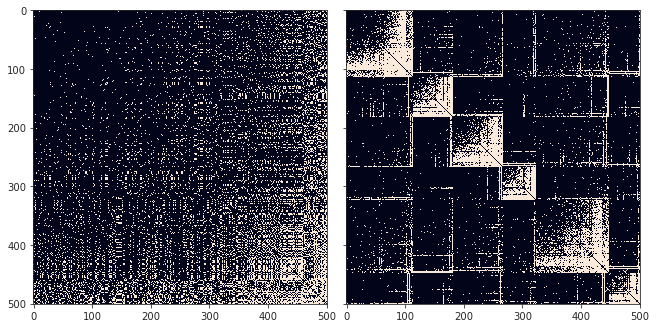

In [8]:
fig, axes = create_figure(1, 2, (9, 4.5), 'all', 'all', constrained_layout=True)
axes[0].imshow(lfr['a'])
axes[1].imshow(lfr['a'][sorted_nodes][:, sorted_nodes])
plt.show()

<matplotlib.lines.Line2D object at 0x7faf3baaec40>

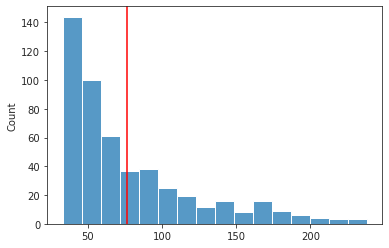

In [9]:
sns.histplot(lfr['a'].sum(0))
plt.axvline(lfr['a'].sum(0).mean(), color='r')

In [12]:
len(looper)

19

In [13]:
%%time

mu = 0.1
lfr = {}
for of, om in looper:
    s = [
        f"of{of}",
        f"om{om}",
        f"mu{mu}",
    ]
    s = '-'.join(s)
    for mode, o in bt_dict.items():
        for key in tqdm(o.address, leave=False):
            name = f"{s}_{mode2lbl[mode]}_{key}"
            lfr[(of, om, mode2lbl[mode], key)] = load_lfr(
                load_dir=pjoin(lfr_dir, 'results', name),
                random_state=mice.cfg.random_state,
                verbose=False,
            )
len(lfr)

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

CPU times: user 27min 46s, sys: 46 s, total: 28min 32s
Wall time: 27min 58s


6346

### Distribution of $<k>$

In [18]:
df = []
for mode, o in bt_dict.items():
    for key, (i, j, k) in o.address.items():
        k_avg = bn.nanmean(o.run_deg[i, j, k], 0)
        k_avg /= np.isfinite(o.run_deg[i, j, k]).sum()
        df.append({
            'Label': ['Real'],
            'of': [np.nan],
            'om': [np.nan],
            'lbl': [mode2lbl[mode]],
            'key': [key],
            'k_avg': [k_avg],
        })
for (of, om, lbl, key), x in lfr.items():
    if not x:
        continue
    df.append({
        'Label': ['LFR'],
        'of': [np.round(of, 2)],
        'om': [om],
        'lbl': [lbl],
        'key': [key],
        'k_avg': [x['a'].sum(0).mean() / len(x['a'])],
    })
df = pd.DataFrame(merge_dicts(df))
df.shape

(6626, 6)

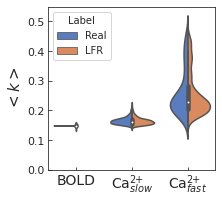

In [19]:
fig, ax = create_figure(1, 1, (3, 3))

sns.violinplot(
    data=df,
    x='lbl',
    y='k_avg',
    hue='Label',
    split=True,
    palette='muted',
    ax=ax,
    # dodge=True,
)
ax.set_ylim(0, 0.55)
ax.set_xticklabels([BOLD, CAS, CAF])
ax.tick_params('both', direction='in')
ax.tick_params('x', labelsize=14)
ax.tick_params('y', labelsize=11)
ax.set_ylabel(r'$<k>$', fontsize=15)
ax.set_xlabel('')
plt.show()

### Distribution of # comm as a function of overlap fraction

In [20]:
df = []
for (of, om, lbl, key), x in lfr.items():
    if not x:
        continue
    df.append({
        'of': [of],
        'om': [om],
        'lbl': [lbl],
        'key': [key],
        'num_nodes': [len(x['a'])],
        'num_comm': [len(x['community'])],
    })
df = pd.DataFrame(merge_dicts(df))
df.shape

(6292, 6)

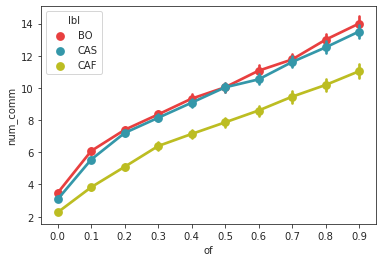

In [30]:
fig, ax = create_figure()

sns.pointplot(
    data=df,
    x='of',
    y='num_comm',
    hue='lbl',
    palette={mode2lbl[k]: v for k, v in pal.items()},
    ax=ax,
)
ax.set_xticklabels(([
    np.round(float(t.get_text()), 1)
    for t in ax.get_xticklabels()
]))
plt.show()

## Analyze (memships)

In [6]:
len(os.listdir(pjoin(lfr_dir, 'results')))

6346

In [7]:
counts = []
for item in sorted(os.listdir(pjoin(lfr_dir, 'results'))):
    _dir = pjoin(lfr_dir, 'results', item)
    counts.append(len(os.listdir(_dir)))
collections.Counter(counts).most_common()

[(15, 6292), (1, 54)]

In [8]:
lfr_sv = compile_lfr_results(lfr_dir)
len(lfr_sv)

of0.9-om3-mu0.1_CAS_sub-SLC10_ses-3_run-7: 100%|█| 6346/6346 [38:43<00:00,  2.73


19

In [84]:
%%time

df = []
bins = np.linspace(0.2, 1.0, 5)
for k, v in lfr_sv.items():
    of, om, mu = map(
        lambda s: float(re.sub('[a-zA-Z]', '', s)),
        k.split('-'),
    )
    of = np.round(of, 1)
    tag = 'Disjoint' if of == 0 else 'Overlapping'
    for name, x in v.items():
        lbl = name.split('_')[0]
        key = '_'.join(name.split('_')[1:])
        pi = x / np.sum(x, axis=1, keepdims=True)
        cut = cut_data(
            data=pi,
            bins=bins,
            axis_oc=1,
            axis_node=2,
            axis_batch=0,
            oc_only=True,
        )[0]
        cut = {
            i + 1: x for i, x in
            enumerate(avg(cut, 1))
        }
        df.append({
            'mu': [mu] * len(cut),
            'of': [of] * len(cut),
            'om': [om] * len(cut),
            'Label': [tag] * len(cut),
            'lbl': [lbl] * len(cut),
            'key': [key] * len(cut),
            'bin_idx': cut.keys(),
            'portion': cut.values(),
        })
df = pd.DataFrame(merge_dicts(df))

CPU times: user 34.1 s, sys: 7.59 ms, total: 34.1 s
Wall time: 34.1 s


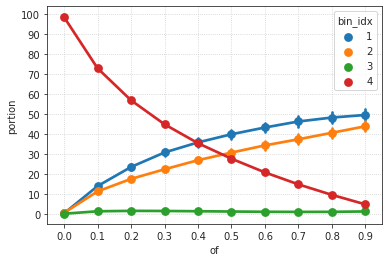

In [85]:
fig, ax = create_figure()

sns.pointplot(
    data=df,
    x='of',
    y='portion',
    hue='bin_idx',
    ax=ax
)
ax.locator_params(axis='y', nbins=11)
ax.set_xticklabels(([
    np.round(float(t.get_text()), 1)
    for t in ax.get_xticklabels()
]))
ax.grid()
plt.show()

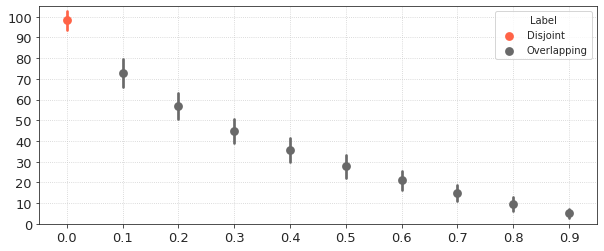

In [179]:
fig, ax = create_figure(1, 1, (10, 4))

_df = df.loc[df['bin_idx'] == 4]
sns.pointplot(
    data=_df,
    ci='sd',
    x='of',
    y='portion',
    hue='Label',
    join=False,
    palette={'Disjoint': 'tomato', 'Overlapping': 'dimgrey'},
    ax=ax
)
ax.set(ylim=(0, 105), xlabel='', ylabel='')
ax.locator_params(axis='y', nbins=11)
ax.set_xticklabels(([
    np.round(float(t.get_text()), 1)
    for t in ax.get_xticklabels()
]))
ax.tick_params(axis='both', labelsize=13)
ax.grid()
fig.savefig(pjoin(fig_dir, 'lastbin.pdf'), **kws_fig)
plt.show()

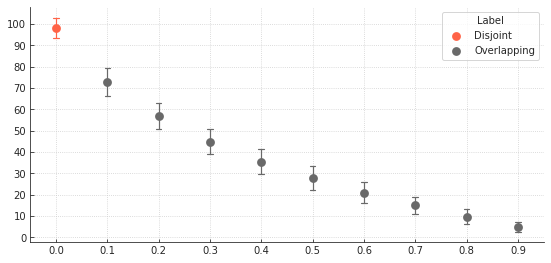

In [280]:
fg = sns.catplot(
    data=_df,
    kind='point',
    ci='sd',
    x='of',
    y='portion',
    hue='Label',
    join=False,
    palette={'Disjoint': 'tomato', 'Overlapping': 'dimgrey'},
    legend_out=False,
    errwidth=1.2,
    capsize=0.11,
    aspect=2,
    height=4,
)
fg.ax.tick_params(direction='in')
fg.ax.locator_params(nbins=12)
fg.ax.set(xlabel='', ylabel='')
fg.ax.grid()

fg.fig.savefig(pjoin(fig_dir, 'lastbin.pdf'), **kws_fig)

In [229]:
means = dict(_df.groupby(['of']).mean()['portion'])
means

{
    0.0: 98.31145264146146,
    0.1: 72.85727873977436,
    0.2: 56.88407246448696,
    0.3: 44.925311217316526,
    0.4: 35.49290642885452,
    0.5: 27.773097642499433,
    0.6: 20.94567735249534,
    0.7: 14.970997204129858,
    0.8: 9.743650408682464,
    0.9: 5.013096261826585
}

In [230]:
select = collections.defaultdict(list)
for k, v in lfr_sv.items():
    of, om, mu = map(
        lambda s: float(re.sub('[a-zA-Z]', '', s)),
        k.split('-'),
    )
    of = np.round(of, 1)
    tag = 'Disjoint' if of == 0 else 'Overlapping'
    for name, x in v.items():
        if x.shape[1] == 7:
            select[of].append(x)
select = dict(sorted(select.items()))
{k: len(v) for k, v in select.items()}

{
    0.1: 96,
    0.2: 159,
    0.3: 135,
    0.4: 99,
    0.5: 81,
    0.6: 65,
    0.7: 27,
    0.8: 16,
    0.9: 13
}

In [231]:
select_idxs = {}
for of, xlist in select.items():
    cost = []
    for x in xlist:
        pi = x / np.sum(x, axis=1, keepdims=True)
        cut = cut_data(
            data=pi,
            bins=np.linspace(0.2, 1, 5),
            axis_oc=1,
            axis_node=2,
            axis_batch=0,
            oc_only=True,
        )[0]
        cut = bn.nanmean(cut, 0)
        cost.append(abs(bn.nanmean(cut, 0)[-1] - means[of]))
    select_idxs[of] = np.argmin(cost)

In [241]:
cut_disj = np.zeros((7, 4))
cut_disj[:, -1] = 100    
select_cut = {0.0: cut_disj}

for of, xlist in select.items():
    x = xlist[select_idxs[of]]
    pi = x / np.sum(x, axis=1, keepdims=True)
    cut = cut_data(
        data=pi,
        bins=np.linspace(0.2, 1, 5),
        axis_oc=1,
        axis_node=2,
        axis_batch=0,
        oc_only=True,
    )[0]
    select_cut[of] = bn.nanmean(cut, 0)

### Do cut plots

In [246]:
xs = (bins[1:] + bins[:-1]) / 2


def _do_cut_plot(cut, figsize=(3.5, 3.5)):
    fig, ax = create_figure(1, 1, figsize, dpi=100)
    colors = get_cluster_cmap(range(len(cut)), return_colors=True)[1]
    for i, y in enumerate(cut):
        ax.plot(
            xs,
            y,
            color=colors[i],
            marker='o',
            markersize=5,
            label=f'{i+1}',
        )
    ax.axvspan(0.8, 1.0, color='#2d3938', alpha=0.05)
    ax.set(ylim=(0, 100), xlim=(0.8, 1.0))
    ax.set_xticks(bins)
    ax.legend(fontsize=5)
    ax.grid()
    plt.close()
    
    return fig, ax

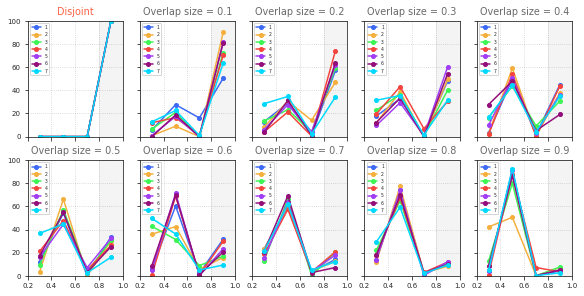

In [297]:
fig, axes = create_figure(2, 5, (8, 4), 'all', 'all', constrained_layout=True)
for i, (of, cut) in enumerate(select_cut.items()):
    ax = axes.flat[i]
    colors = get_cluster_cmap(range(len(cut)), return_colors=True)[1]
    for i, y in enumerate(cut):
        ax.plot(
            xs,
            y,
            color=colors[i],
            marker='o',
            markersize=4,
            label=f'{i+1}',
        )
    title = 'Disjoint' if of == 0 else f"Overlap size = {of}"
    title_color = 'tomato' if of == 0 else 'dimgrey'
    ax.set_title(title, fontsize=9.7, color=title_color, )
    ax.axvspan(0.8, 1.0, color='#2d3938', alpha=0.05)
    ax.tick_params(labelsize=7)
    ax.set(ylim=(0, 100), xlim=(0.8, 1.0))
    ax.set_xticks(bins)
    ax.legend(fontsize=4.5)
    ax.grid()
fig.savefig(pjoin(fig_dir, f'example_all.pdf'), **kws_fig)
plt.show()

In [244]:
for of, cut in select_cut.items():
    fig, _ = _do_cut_plot(cut)
    fig.savefig(pjoin(fig_dir, f'of={of:0.2f}.pdf'), **kws_fig)

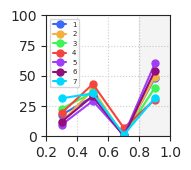

In [251]:
cut = select_cut[0.3]
fig, ax = _do_cut_plot(cut, (1.6, 1.6))
fig

In [252]:
1.6 * 5

8.0

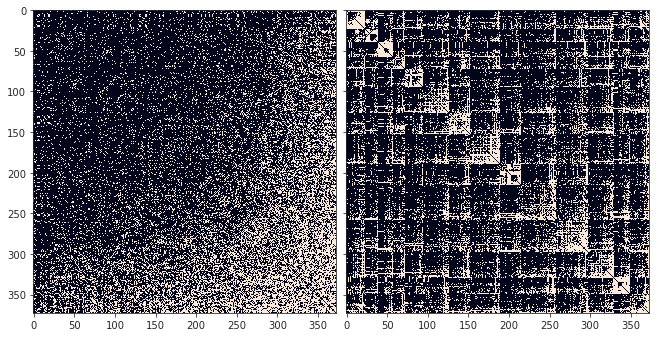

In [38]:
fig, axes = create_figure(1, 2, (9, 4.5), 'all', 'all', constrained_layout=True)
axes[0].imshow(lfr['a'])
axes[1].imshow(lfr['a'][sorted_nodes][:, sorted_nodes])
plt.show()